## Домашнее задание 3 (10 баллов)

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [1]:
import pandas as pd

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [2]:
data = pd.read_csv('german_credit.csv', sep=',')
print('Размер:', *data.shape)
print('-----------------------------------------------------')
print(data.head(5))
print('-----------------------------------------------------')
print(data.tail(5))

Размер: 1000 21
-----------------------------------------------------
                status  duration                               credit_history  \
0  no checking account        18      all credits at this bank paid back duly   
1  no checking account         9      all credits at this bank paid back duly   
2           ... < 0 DM        12  no credits taken/all credits paid back duly   
3  no checking account        12      all credits at this bank paid back duly   
4  no checking account        12      all credits at this bank paid back duly   

      purpose  amount                     savings employment_duration  \
0  car (used)    1049  unknown/no savings account              < 1 yr   
1      others    2799  unknown/no savings account    1 <= ... < 4 yrs   
2  retraining     841               ... <  100 DM    4 <= ... < 7 yrs   
3      others    2122  unknown/no savings account    1 <= ... < 4 yrs   
4      others    2171  unknown/no savings account    1 <= ... < 4 yrs   

  in

### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [3]:
# выбираем столбцы, в которых типы int или float
quantitative_columns = data.select_dtypes(include=['float', 'int']).columns  # количественные
binary_columns = []  # бинарные
# с помощью цикла выводим уникальные значения столбца
for column_name in data.columns:
    # "исключили" из цикла количественные столбцы
    if column_name == 'duration' or column_name == 'age' or column_name == 'amount':
        continue
    # проверяем длину списка, в котором записаны значения столбца `column_name`
    if len(data[column_name].unique()) == 2:
        # если длина = 2, то мы добавляем в список бинарных столбцов
        binary_columns.append(column_name)
        continue
    # выводим столбец и его уникальные значения
    print(column_name, data[column_name].unique(), sep=' --- ')
    print()
# после работы цикла определяем порядковые и категориальные столбцы
ordinal_columns = ['status', 'savings', 'employment_duration',
                   'installment_rate', 'present_residence', 'number_credits']  # порядковые
categorical_columns = ['credit_history',
                       'purpose', 'personal_status_sex',
                       'other_debtors', 'property',
                       'other_installment_plans', 'housing', 'job']  # категориальные
print('--------------------')
print('False - нет пропуска, True - есть пропуск:', data.isnull().any().any())  # проверка на наличие пропусков
print('Количественные столбцы:', *quantitative_columns)
print('Бинарные столбцы:', *binary_columns)
print('Порядковые столбцы:', *ordinal_columns)
print('Категориальные столбцы:', *categorical_columns)

status --- ['no checking account' '... < 0 DM'
 '... >= 200 DM / salary for at least 1 year' '0<= ... < 200 DM']

credit_history --- ['all credits at this bank paid back duly'
 'no credits taken/all credits paid back duly'
 'existing credits paid back duly till now'
 'delay in paying off in the past'
 'critical account/other credits elsewhere']

purpose --- ['car (used)' 'others' 'retraining' 'furniture/equipment' 'car (new)'
 'business' 'domestic appliances' 'radio/television' 'repairs' 'vacation']

savings --- ['unknown/no savings account' '... <  100 DM' '100 <= ... <  500 DM'
 '... >= 1000 DM' '500 <= ... < 1000 DM']

employment_duration --- ['< 1 yr' '1 <= ... < 4 yrs' '4 <= ... < 7 yrs' 'unemployed' '>= 7 yrs']

installment_rate --- ['< 20' '25 <= ... < 35' '20 <= ... < 25' '>= 35']

personal_status_sex --- ['female : non-single or male : single' 'male : married/widowed'
 'female : single' 'male : divorced/separated']

other_debtors --- ['none' 'guarantor' 'co-applicant']

presen

### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [4]:
print(data.groupby("purpose")["amount"].mean())
# done

purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64


### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [5]:
print('Моложе 30:',
      data.loc[data['age'] <= 30].loc[data['housing'] == 'rent'].shape[0] / data.loc[data['age'] <= 30].shape[0])
print('Старше 40:',
      data.loc[data['age'] >= 40].loc[data['housing'] == 'rent'].shape[0] / data.loc[data['age'] >= 40].shape[0])
# done

Моложе 30: 0.6821515892420538
Старше 40: 0.68561872909699


### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [6]:
print(data.loc[data['foreign_worker'] == 'yes'].loc[
          (data['number_credits'] != '1') | (data['number_credits'] != '2-3')].shape[0])
print(data['number_credits'].unique())  # чтобы проверить подходящие значения
# done

37
['1' '2-3' '4-5' '>= 6']


### Задание 6 (1 балл)

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

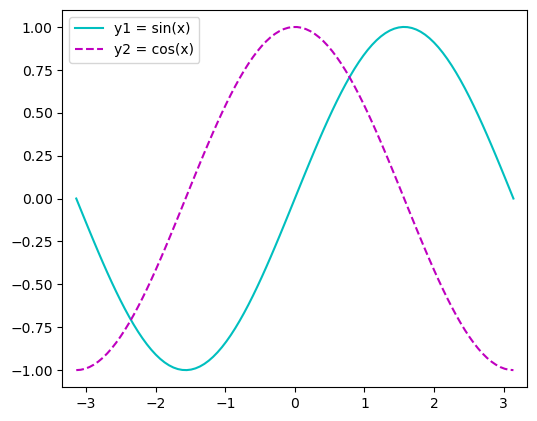

In [8]:
x = np.linspace(-np.pi, np.pi, 100)
y1 = np.sin(x)
y2 = np.cos(x)

plt.figure(figsize=(6, 5), dpi=100)
plt.plot(x, y1, 'c', x, y2, 'm--')
plt.legend(['y1 = sin(x)', 'y2 = cos(x)'], loc=2)
plt.axis([-np.pi - 0.2, np.pi + 0.2, -1.1, 1.1])  # [xstart, xend, ystart, yend]
plt.show()
# done

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

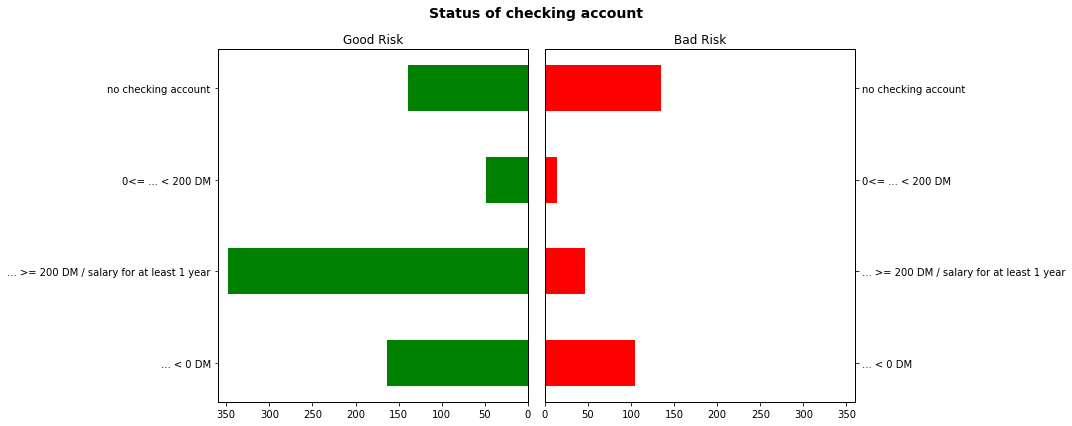

In [9]:
def plot_checking_account_status(df, risk_label, ax):
    counts = df[df['credit_risk'] == risk_label]['status'].value_counts()
    y_ticks = ['no checking account', '0<= ... < 200 DM', '... >= 200 DM / salary for at least 1 year', '... < 0 DM']
    y = np.arange(len(y_ticks))
    ax.barh(y, counts[y_ticks].values, height=0.5, color='green' if risk_label == 'good' else 'red')
    ax.set_yticks(y)
    ax.set_yticklabels(y_ticks)
    ax.invert_yaxis()  # поменяем порядок значений на оси y
    ax.set_xlim(0, 360)
    ax.set_title('Good Risk' if risk_label == 'good' else 'Bad Risk')
    if risk_label == 'good':
        ax.invert_xaxis()
    if risk_label == 'bad':
        ax.yaxis.tick_right()
    ax.grid(False)
    for spine in ax.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(1)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
plot_checking_account_status(data, 'good', ax1)
plot_checking_account_status(data, 'bad', ax2)
fig.suptitle('Status of checking account', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()
# done

### Задание 8  (0.5 балла)

In [10]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

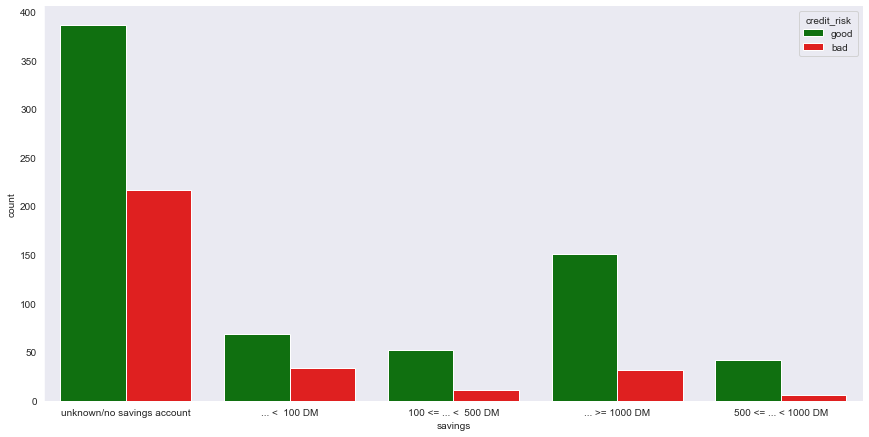

In [11]:
sns.set_style('darkgrid')
ax = sns.catplot(x='savings', kind='count', data=data,
                    hue='credit_risk', palette=['green', 'red'],
                    height=6, aspect=2, legend=None)
plt.legend(['good', 'bad'], loc=0, title='credit_risk')
plt.grid(False)
plt.show()
# done

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

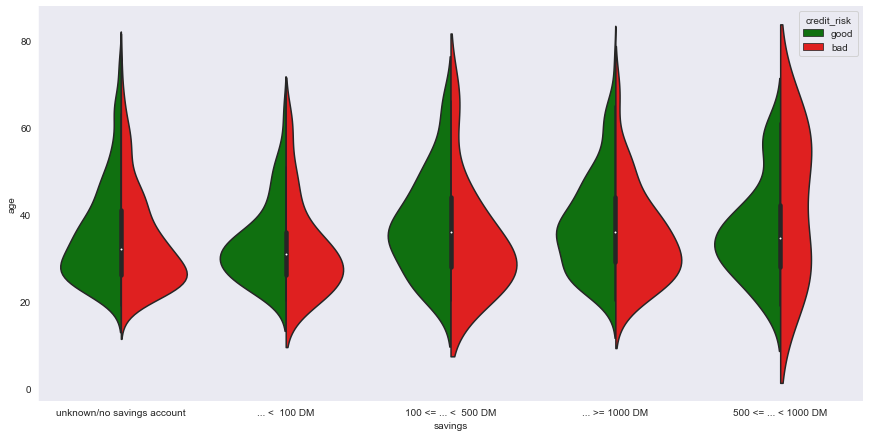

In [12]:
sns.catplot(data=data, x='savings', y='age', hue='credit_risk',
            kind='violin', palette=['green', 'red'], split=True,
            height=6, aspect=2, legend_out=False)
plt.grid(False)
plt.show()

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

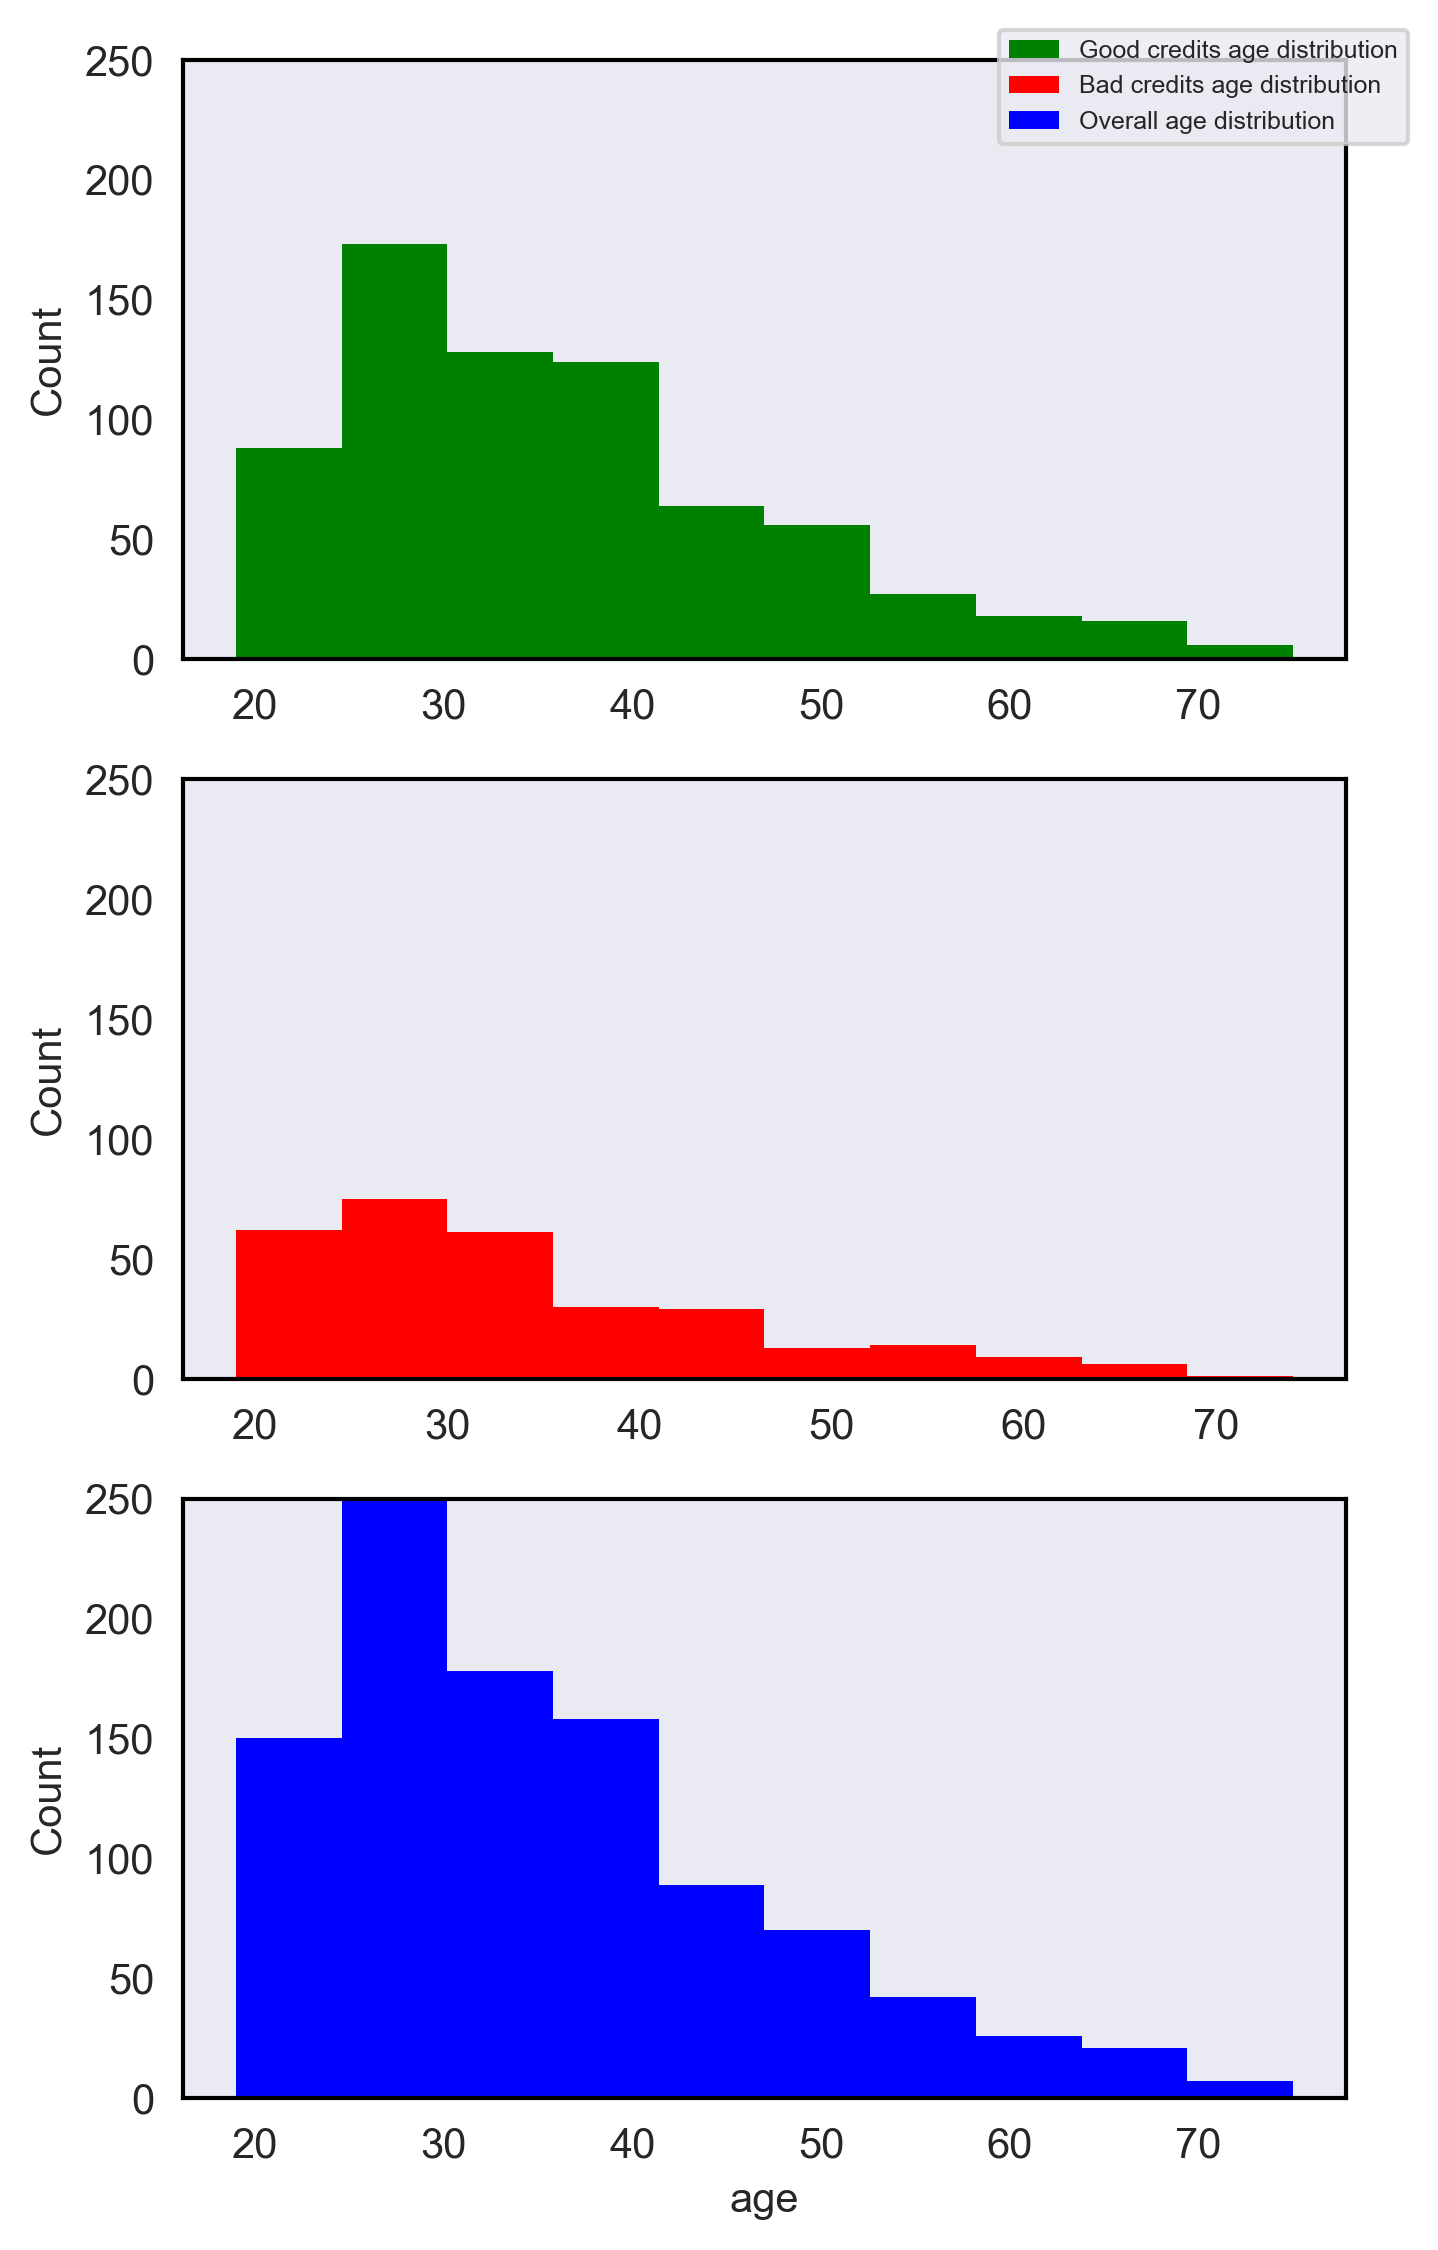

In [13]:
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(5, 9), dpi=300)

axs[0].hist(data=data[data['credit_risk'] == 'good'],
            x='age',
            color='green',
            edgecolor='none',
            label='Good credits age distribution')
axs[0].set_ylabel('Count')
axs[0].set_ylim(top=250)
axs[0].set_xlabel('')
axs[0].grid(False)

axs[1].hist(data=data[data['credit_risk'] == 'bad'],
            x='age',
            color='red',
            edgecolor='none',
            label='Bad credits age distribution')
axs[1].set_ylabel('Count')
axs[1].set_ylim(top=250)
axs[1].set_xlabel('')
axs[1].grid(False)


axs[2].hist(data=data,
            x='age',
            color='blue',
            edgecolor='none',
            label='Overall age distribution')
axs[2].set_ylabel('Count')
axs[2].set_xlabel('age')
axs[2].set_ylim(top=250)
axs[2].grid(False)

for i in range(0, 3):
    for spine in axs[i].spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(1)


fig.legend(loc='center right', bbox_to_anchor=(0.95, 0.87), fontsize=6)

plt.show()

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

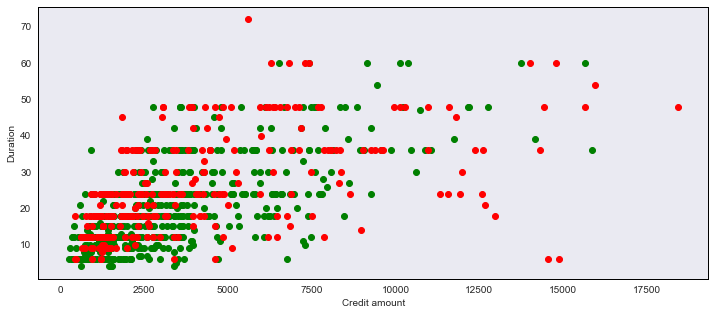

In [14]:
fig, ax = plt.subplots(figsize=(12, 5))

colors = {'good': 'green', 'bad': 'red'}

# строим диаграмму рассеяния
for i, label in enumerate(['good', 'bad']):
    y = data[data['credit_risk'] == label]['duration']
    x = data[data['credit_risk'] == label]['amount']
    ax.scatter(x, y, c=colors[label], label=label)

ax.set_ylabel('Duration')
ax.set_xlabel('Credit amount')
ax.grid(False)
for spine in ax.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1)
plt.show()


### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

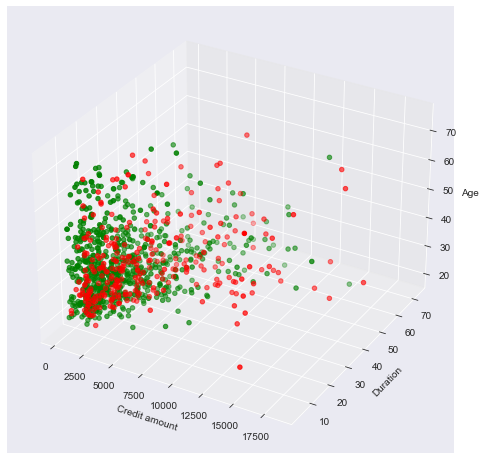

In [15]:
""" 
Не в юпитере показывает подпись ось Z, а тут почему-то нет, не знаю, что с этим делать( 
"""

fig = plt.figure(figsize=(8, 12))
ax = fig.add_subplot(111, projection='3d')

# Разделение данных на положительные и отрицательные кейсы
positive_cases = data[data['credit_risk'] == 'good']
negative_cases = data[data['credit_risk'] == 'bad']

# Построение точек для положительных и отрицательных кейсов
ax.scatter(negative_cases['amount'], negative_cases['duration'], negative_cases['age'], color='red', label='Bad Risk')
ax.scatter(positive_cases['amount'], positive_cases['duration'], positive_cases['age'], color='green', label='Good Risk')

# Настройка осей
ax.set_ylabel('Duration')
ax.set_xlabel('Credit amount')
ax.set_zlabel('Age')
# Отображение графика
plt.show()


### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [16]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

data = data.drop(columns=categorical_columns)

# создание объекта LabelEncoder
le = LabelEncoder()

# создание объекта OrdinalEncoder
enc = OrdinalEncoder()

# преобразование порядковых признаков
for column in ordinal_columns:
    data[column] = enc.fit_transform(data[ordinal_columns])

# преобразование бинарных признаков
for feature in binary_columns:
    data[feature] = le.fit_transform(data[feature])


data.head(30)

,status,duration,amount,savings,employment_duration,installment_rate,present_residence,age,number_credits,people_liable,telephone,foreign_worker,credit_risk
0,3.0,18,1049,3.0,3.0,3.0,3.0,21,3.0,0,0,0,1
1,3.0,9,2799,3.0,3.0,3.0,3.0,36,3.0,1,0,0,1
2,0.0,12,841,0.0,0.0,0.0,0.0,23,0.0,0,0,0,1
3,3.0,12,2122,3.0,3.0,3.0,3.0,39,3.0,1,0,1,1
4,3.0,12,2171,3.0,3.0,3.0,3.0,38,3.0,0,0,1,1
5,3.0,10,2241,3.0,3.0,3.0,3.0,48,3.0,1,0,1,1
6,3.0,8,3398,3.0,3.0,3.0,3.0,39,3.0,0,0,1,1
7,3.0,6,1361,3.0,3.0,3.0,3.0,40,3.0,1,0,1,1
8,1.0,18,1098,1.0,1.0,1.0,1.0,65,1.0,0,0,0,1
9,0.0,24,3758,0.0,0.0,0.0,0.0,23,0.0,0,0,0,1


### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [21]:
def predict(Xtest: np.array) -> np.array:
    y_pred = []
    for i in range(Xtest.shape[0]):
        if Xtest[i,0] >= 2 and Xtest[i,3] >= 2 and Xtest[i,5] < 4 and Xtest[i,8] <= 2:
            y_pred.append(0)
        else:
            y_pred.append(1)
    return np.array(y_pred)

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = data.drop('credit_risk', 1).values
y = data['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

print(accuracy_score(y_test, predict(X_test)))


0.644


<ipython-input-21-5eaedcebadfa>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = data.drop('credit_risk', 1).values


In [ ]:
print(binary_columns)
print(binary_columns + ordinal_columns)